##                                          MACHINE LEARNING ASSIGNMENT


## MULTILINEAR REGRESSION
  

## IMPORT NECESSARY LIBRARIES.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder


/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


##  1. Load dataset AND look at the top five rows.

In [2]:
df = pd.read_csv('train_titanic.csv')
print("\n                                          TOP FIVE ROWS ARE                      \n")
df.head()


                                          TOP FIVE ROWS ARE                      



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## #2. Check the shape of the DataFrame (rows, columns).

In [3]:
print("NUMBER OF ROWS AND COLUMNS ARE:",df.shape)


NUMBER OF ROWS AND COLUMNS ARE: (891, 12)


## 3. Look at the data types of the columns.


In [4]:
print("\nDATA TYPES OF THE COLUMNS  \n")
df.dtypes


DATA TYPES OF THE COLUMNS  



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 4. Check for missing  values.

In [5]:
print("MISSING VALUES IN THE DATASET\n")
df.isnull().sum()

MISSING VALUES IN THE DATASET



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 5. Preprocessing.

In [6]:
df = df[['Fare', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex', 'Embarked']]
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Fare        0
Pclass      0
Age         0
SibSp       0
Parch       0
Sex         0
Embarked    0
dtype: int64

## 6. Encode categorical variables.

In [8]:
sex = LabelEncoder()
embarked = LabelEncoder()

df['Sex'] = sex.fit_transform(df['Sex'])
df['Embarked'] = embarked.fit_transform(df['Embarked'])


In [9]:
df

,Fare,Pclass,Age,SibSp,Parch,Sex,Embarked
0,7.2500,3,22.0,1,0,1,2
1,71.2833,1,38.0,1,0,0,0
2,7.9250,3,26.0,0,0,0,2
3,53.1000,1,35.0,1,0,0,2
4,8.0500,3,35.0,0,0,1,2
...,...,...,...,...,...,...,...
885,29.1250,3,39.0,0,5,0,1
886,13.0000,2,27.0,0,0,1,2
887,30.0000,1,19.0,0,0,0,2
889,30.0000,1,26.0,0,0,1,0


## 7. Features and Target.

In [10]:
#X = df.drop(columns='Fare')
X=df.iloc[:,1:]
#y = df['Fare']
y=df.iloc[:,0]

In [11]:
X

,Pclass,Age,SibSp,Parch,Sex,Embarked
0,3,22.0,1,0,1,2
1,1,38.0,1,0,0,0
2,3,26.0,0,0,0,2
3,1,35.0,1,0,0,2
4,3,35.0,0,0,1,2
...,...,...,...,...,...,...
885,3,39.0,0,5,0,1
886,2,27.0,0,0,1,2
887,1,19.0,0,0,0,2
889,1,26.0,0,0,1,0


In [12]:
y

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
885    29.1250
886    13.0000
887    30.0000
889    30.0000
890     7.7500
Name: Fare, Length: 712, dtype: float64

## 8. Split data.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print("\nSHAPE OF THE TRAIN AND TEST DATA\n")
X_train.shape,X_test.shape,y_train.shape,y_test.shape


SHAPE OF THE TRAIN AND TEST DATA



((569, 6), (143, 6), (569,), (143,))

## 9. Model training.

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 10. Prediction.

In [16]:
y_pred = model.predict(X_test)
print("\n                        MODEL PREDICTIONS             \n")
y_pred


                        MODEL PREDICTIONS             



array([ 79.10949931,  83.6765776 ,  72.26920264, 112.18663394,
        27.14454845,  90.70649391,  19.14796856,  72.00699393,
        56.40778176,   3.96369411,  -3.1344045 ,  25.11310915,
        -3.38833441,  56.49350568,  26.10334499,  -4.23476745,
        35.34301001,  -3.72690763,  86.30052002,  53.6148867 ,
        -3.38833441,  41.72804097,  75.646656  ,  41.61123318,
        -3.89619424,  34.7515875 ,  31.76068281,  17.95909027,
        -4.06548085,  78.40396382,  41.43366777,  18.07417004,
        -3.89619424,  -3.30369111,  77.57591301,  44.69695706,
        35.9929446 ,  93.03165636,  76.23162697,  10.18384524,
        79.92001114,  45.00191799,  -5.08120049,  -6.52013666,
        11.96522665,  -5.2504871 ,  -3.21904781,  36.4041256 ,
        27.65240828,  10.94563497,  33.65842273,  -4.15012415,
         3.45583428,  -3.81155093,  -5.1658438 ,  62.82873393,
        76.7477656 ,  61.10468739,   3.46411308,  55.2227755 ,
        52.73628917,  89.86006087,  -4.91191389,  63.59

## 11. Evaluation.

In [17]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Squared Error: 3615.6352307955317
R² Score: 0.3013832829562454
Mean Absolute Error: 24.50266718139061


## 12. Display coefficients.

In [18]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients\n")
print(coefficients)


Coefficients

          Coefficient
Pclass     -30.956099
Age         -0.084643
SibSp        7.106377
Parch        9.178260
Sex         -7.352029
Embarked    -6.701447


## 13. Visualization : Residual Plot.

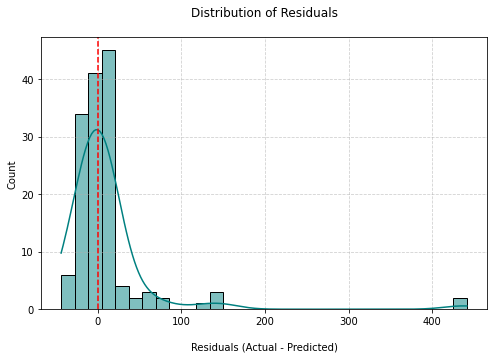

In [19]:
warnings.filterwarnings("ignore", category=FutureWarning)

residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='teal')
plt.axvline(x=0, linestyle='--', color='red')
plt.title("Distribution of Residuals\n")
plt.xlabel("\nResiduals (Actual - Predicted)")
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

## 14. Actual vs Predicted Fare.

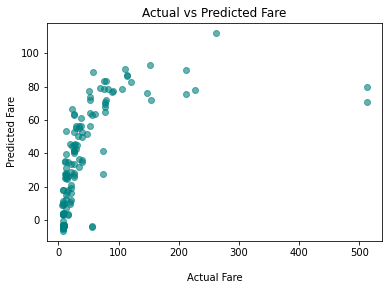

In [20]:
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.xlabel("\nActual Fare\n")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare")
plt.show()

## 15. Residuals vs Predicted.

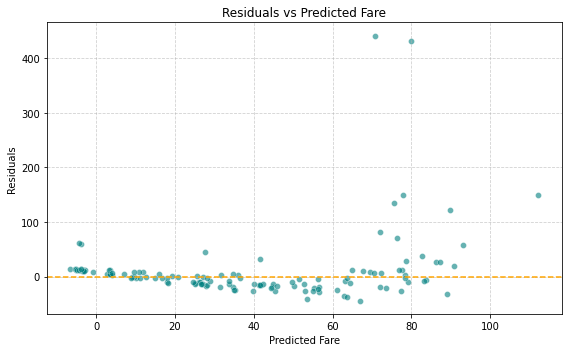

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, color='teal', alpha=0.6)
plt.axhline(0, linestyle='--', color='orange')
plt.title("Residuals vs Predicted Fare")
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()